# EXO1 

In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.util import view_as_blocks
from collections import Counter 

In [2]:
def wavelet_decomposition(image, wavelet='haar', level=5):
    """Perform wavelet decomposition and return concatenated coefficients."""
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)
    return coeffs, coeffs_array, coeff_slices

In [16]:
def plot_wavelet_coefficients(coeffs_array):
    """Plot the concatenated wavelet coefficients as one matrix."""
    plt.figure(figsize=(10, 10))
    plt.imshow(coeffs_array, cmap='gray', aspect='auto')
    plt.colorbar()
    plt.title("Wavelet Coefficients Matrix (5-level Haar decomposition)")
    plt.show()

In [9]:
image = camera()
coeffs, coeffs_array, coeff_slices = wavelet_decomposition(image)

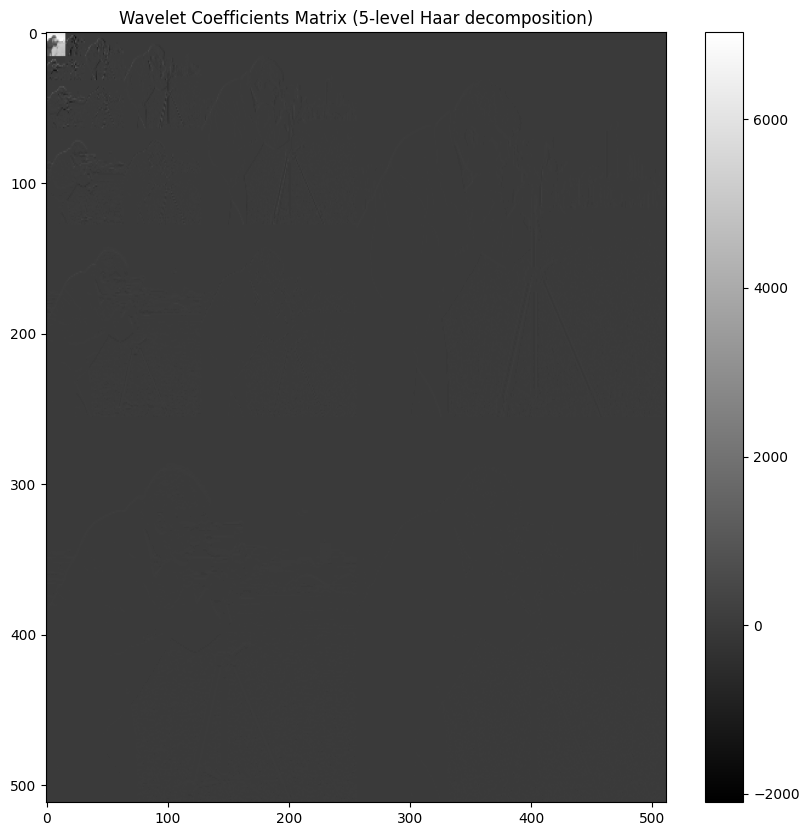

In [17]:
plot_wavelet_coefficients(coeffs_array)

# EXO2

In [4]:
def create_block_image(block_size=16, img_size=256):
    """Create a grayscale image with uniform blocks of size block_size."""
    values = np.arange(0, 256, 256 // (img_size // block_size))
    image = np.repeat(values, block_size).reshape(-1, block_size)
    image = np.tile(image, (block_size, img_size // block_size))
    return image


In [5]:
def calculate_color_frequencies(image):
    """Calculate frequencies of each color in the image."""
    flattened = image.flatten()
    frequencies = Counter(flattened)
    return frequencies

In [6]:
def calculate_entropy(frequencies, total_pixels):
    """Compute the entropy based on color frequencies."""
    probabilities = np.array(list(frequencies.values())) / total_pixels
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Add epsilon to avoid log(0)
    return entropy

In [7]:
def custom_compression(image):
    """Compress image using the custom coding s={22255555533666}->{20050000030600}."""
    compressed = []
    for pixel in image.flatten():
        if pixel == 222:
            compressed.append(200)
        elif pixel == 555:
            compressed.append(500)
        elif pixel == 666:
            compressed.append(600)
        else:
            compressed.append(pixel)
    return np.array(compressed).reshape(image.shape)

In [8]:
def run_length_encoding(image):
    """Perform Run-length encoding on the image."""
    flattened = image.flatten()
    encoding = []
    prev_pixel = flattened[0]
    count = 1
    for pixel in flattened[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoding.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoding.append((prev_pixel, count))
    return encoding

In [12]:
block_image = create_block_image()
frequencies = calculate_color_frequencies(block_image)
entropy = calculate_entropy(frequencies, block_image.size)

In [13]:
compressed_image = custom_compression(block_image)
compressed_frequencies = calculate_color_frequencies(compressed_image)
compressed_entropy = calculate_entropy(compressed_frequencies, compressed_image.size)

In [14]:
rle_encoded = run_length_encoding(compressed_image)

In [15]:
print("Original Entropy:", entropy)
print("Compressed Entropy:", compressed_entropy)
print("Run-length Encoding:", rle_encoded[:10], "...")

Original Entropy: 3.9999999976916882
Compressed Entropy: 3.9999999976916882
Run-length Encoding: [(0, 256), (16, 256), (32, 256), (48, 256), (64, 256), (80, 256), (96, 256), (112, 256), (128, 256), (144, 256)] ...
